In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import os

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical

In [3]:
trainset=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TrainingSet.xlsx" , names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])
trainlab=pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Training Label.xlsx" , names = ['labels'])

In [5]:
trainset.insert(10 ,'labels' , trainlab)

In [6]:
trainset.shape                   

(17740, 11)

In [7]:
testset =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/TestingSet.xlsx", names =['vale1','vale2','vale3','vale4','vale5','vale6','vale7','vale8','vale9','vale10'])
testlab =pd.read_excel(r"C:/Users/KIIT/Dataset/Classification_Dataset/Testing Label.xlsx", names = ['labels' ,'n','n','n','n','n','n'])

In [8]:
testlab=testlab.drop(columns=testlab.columns[[1,2,3,4,5,6]], axis=1)
testset.insert(10 ,'labels' , testlab)

In [9]:
dataset = pd.concat( [ trainset, testset ], ignore_index= True )

In [10]:
dataset

,vale1,vale2,vale3,vale4,vale5,vale6,vale7,vale8,vale9,vale10,labels
0,-0.132753,-0.163220,0.298510,-0.386726,0.934570,-0.386188,-0.292001,-0.211995,0.197731,-0.007056,1
1,-0.196359,-0.214179,0.295062,-0.257458,0.937696,-0.357075,-0.319707,-0.473274,0.159579,0.022640,1
2,-0.077665,-0.108193,0.374364,-0.218162,0.993907,-0.400560,-0.379472,-0.504703,0.209512,0.075953,1
3,-0.099537,-0.132895,0.315553,-0.334031,1.171973,-0.488372,-0.408483,-0.416131,0.057927,0.196741,1
4,-0.093664,-0.126818,0.277582,-0.362626,1.325761,-0.446401,-0.309932,-0.527190,-0.033661,0.207670,1
5,-0.071074,-0.101462,0.300357,-0.290092,1.024788,-0.406208,-0.348910,-0.428371,0.195205,0.062890,1
6,-0.069871,-0.111972,0.279140,-0.201363,1.004114,-0.442503,-0.355022,-0.330224,0.168673,0.017634,1
7,-0.068963,-0.118867,0.283830,-0.210582,0.929242,-0.374093,-0.325621,-0.323518,0.163830,-0.041561,1
8,-0.066107,-0.108463,0.281386,-0.209719,0.961061,-0.337995,-0.305571,-0.507315,0.168188,0.087584,1
9,-0.088034,-0.098137,0.328374,-0.358000,1.118687,-0.433385,-0.340641,-0.402243,0.209406,0.078348,1


In [11]:
dataset['labels'].value_counts()

1    9656
5    5475
2    4609
3    3692
4    1358
7     976
6     816
8     730
Name: labels, dtype: int64

In [12]:
dataset = dataset.sample(frac=1)   #df.sample shuffles the dataset, frac=1 means we take whole dataset as sample

In [13]:
y = dataset.pop('labels').values

In [14]:
x = dataset.values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.40, random_state=1) # 60-40 split
x_test, x_val, y_test, y_val  = train_test_split(x_test, y_test, test_size=0.50, random_state=1)  #50-50 split on 40% of data
    

In [16]:
print(('features',x_train.shape,'labels',y_train.shape))                 #Tranning set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_train, return_counts=True)).T)


('features', (16387, 10), 'labels', (16387,))
Label Name  Count
[[   1 5785]
 [   2 2710]
 [   3 2264]
 [   4  821]
 [   5 3271]
 [   6  495]
 [   7  596]
 [   8  445]]


In [17]:
print(('features',x_val.shape,'labels',y_val.shape))                 #Validation set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_val, return_counts=True)).T)

('features', (5463, 10), 'labels', (5463,))
Label Name  Count
[[   1 1896]
 [   2  984]
 [   3  708]
 [   4  262]
 [   5 1088]
 [   6  158]
 [   7  211]
 [   8  156]]


In [18]:
print(('features',x_test.shape,'labels',y_test.shape))                 #Test set size
print('Label Name ' , 'Count')
print(np.array(np.unique(y_test, return_counts=True)).T)

('features', (5462, 10), 'labels', (5462,))
Label Name  Count
[[   1 1975]
 [   2  915]
 [   3  720]
 [   4  275]
 [   5 1116]
 [   6  163]
 [   7  169]
 [   8  129]]


In [19]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras_utils import reset_tf_session

In [20]:
#------MLP-----#
s = reset_tf_session
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=(10,)))
model.add(Dense(40,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [21]:
from keras.layers import Conv1D,Dropout,MaxPooling1D,Flatten

In [22]:
#------CNN-----#
s = reset_tf_session
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(10,1)))
model_cnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(40, activation='relu'))
model_cnn.add(Dense(9, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [23]:
x_train_cnn =np.expand_dims(x_train,axis=-1)
x_val_cnn =np.expand_dims(x_val,axis=-1)
x_test_cnn =np.expand_dims(x_test,axis=-1)

In [24]:
x_train_cnn.shape

(16387, 10, 1)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 369       
Total params: 2,449
Trainable params: 2,449
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 64)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                25640     
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 369       
Total params: 30,297
Trainable params: 30,297
Non-trainable params: 0
_________________________________________________________________


In [27]:
import keras_utils

In [28]:
 model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [29]:
 model_cnn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history_cnn = model_cnn.fit(x_train_cnn, y_train ,batch_size=32,  epochs=15, validation_data=(x_val_cnn, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/15








Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


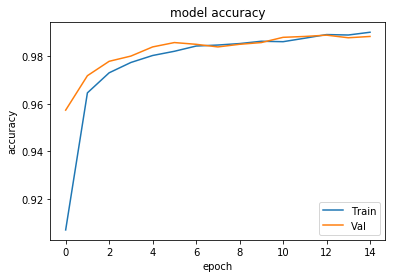

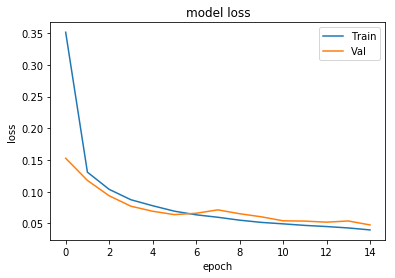

In [31]:
#-- CNN tranning curve -- #

print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [32]:
# Training
history = model.fit(x_train, y_train ,batch_size=32,  epochs=15, validation_data=(x_val, y_val),  callbacks=[keras_utils.TqdmProgressCallback()], verbose=0)


Epoch 1/15




Epoch 2/15




Epoch 3/15




Epoch 4/15




Epoch 5/15




Epoch 6/15




Epoch 7/15




Epoch 8/15




Epoch 9/15




Epoch 10/15




Epoch 11/15




Epoch 12/15




Epoch 13/15




Epoch 14/15




Epoch 15/15


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


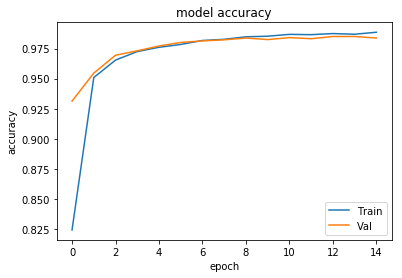

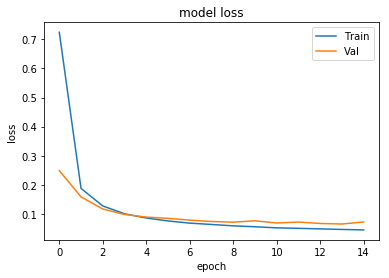

In [35]:
## Learning curve for MLP ##

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [36]:
y_test_oh = keras.utils.to_categorical(y_test, 10)

In [37]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(x_test,batch_size=32)
acc_test = accuracy_score(y_test, y_pred)

3072/5462 [===============>..............] - ETA:  - ETA: 0s

In [38]:
from sklearn.metrics import accuracy_score
y_pred1 = model1.predict_classes(x_test_cnn,batch_size=32)
acc_test1 = accuracy_score(y_test, y_pred1)

4320/5462 [======================>.......] - ETA:  - ETA:  - ETA: 0s

In [66]:
print("Test set accuracy with MLP: {:.5f}".format(acc_test))

Test set accuracy with MLP: 0.98316


In [67]:
print("Test set accuracy with CNN: {:.5f}".format(acc_test1))

Test set accuracy with CNN: 0.98920


In [41]:
y_test

array([2, 1, 1, ..., 1, 1, 5], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix MLP\n')
print(confusion)

Confusion Matrix MLP

[[1957    3    0   10    3    0    2    0]
 [   1  909    0    2    0    1    0    2]
 [   0    0  720    0    0    0    0    0]
 [   2    7    1  253    6    0    6    0]
 [   0    1    0    0 1112    0    3    0]
 [   0    4    0    0    3  154    2    0]
 [   1    2    0    2   21    1  142    0]
 [   0    0    1    1    1    3    0  123]]


In [65]:
from sklearn.metrics import confusion_matrix
confusion_cnn = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix CNN\n')
print(confusion)

Confusion Matrix CNN

[[1957    3    0   10    3    0    2    0]
 [   1  909    0    2    0    1    0    2]
 [   0    0  720    0    0    0    0    0]
 [   2    7    1  253    6    0    6    0]
 [   0    1    0    0 1112    0    3    0]
 [   0    4    0    0    3  154    2    0]
 [   1    2    0    2   21    1  142    0]
 [   0    0    1    1    1    3    0  123]]


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

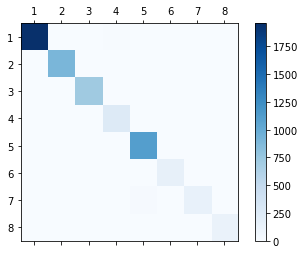

In [44]:
#---- MLP confusion matrix  ----#

xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

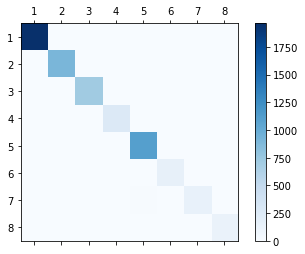

In [63]:
##---- CNN confusion matrix  ---#

xlab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
ylab = [0,1 , 2 ,3 ,4 ,5 ,6 ,7 ,8]
fig = plt.figure()
conf_img = fig.add_subplot(111)
confusion_matrix = conf_img.matshow(confusion_cnn , cmap=plt.cm.Blues )
fig.colorbar(confusion_matrix)
conf_img.set_xticklabels(xlab)
conf_img.set_yticklabels(ylab)

In [68]:
FP = confusion.sum(axis=0) - np.diag(confusion) 
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [69]:
sensitivity

array([0.99088608, 0.99344262, 1.        , 0.92      , 0.99641577,
       0.94478528, 0.84023669, 0.95348837])

In [70]:
specificty

array([0.99885288, 0.99626127, 0.99957824, 0.99710816, 0.99217671,
       0.99905643, 0.99754393, 0.99962498])

In [71]:
ACC

array([0.99597217, 0.99578909, 0.99963383, 0.99322592, 0.99304284,
       0.99743684, 0.99267668, 0.99853534])

In [72]:
print('MLP average Accuracy',ACC.sum()/8)

MLP average Accuracy 0.9957890882460637


In [73]:
FP = confusion_cnn.sum(axis=0) - np.diag(confusion_cnn) 
FN = confusion_cnn.sum(axis=1) - np.diag(confusion_cnn)
TP = np.diag(confusion_cnn)
TN = confusion_cnn.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

sensitivity = TP/(TP+FN)        # Sensitivity

specificty = TN/(TN+FP)         # Specificity

ACC = (TP+TN)/(TP+FP+FN+TN)     # Overall accuracy for each class

In [74]:
print(sensitivity)

[0.99392405 0.99562842 0.99722222 0.95272727 0.99551971 0.98773006
 0.89940828 0.96899225]


In [75]:
specificty

array([0.99827932, 0.99890037, 0.99936736, 0.99787931, 0.99608836,
       0.99792414, 0.99886643, 1.        ])

In [76]:
ACC

array([0.9967045 , 0.99835225, 0.99908458, 0.99560601, 0.99597217,
       0.99761992, 0.99578909, 0.99926767])

In [77]:
print('CNN average Accuracy',ACC.sum()/8)

CNN average Accuracy 0.9972995239838887
